In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mse(actual, predicted):
    return np.sum(np.square(actual-predicted))/len(actual)

In [4]:
def slopes(X,Y):
    xy = np.sum(np.multiply(X, Y))
    y = np.sum(Y)
    x =np.sum(X)
    x2 = np.sum(np.multiply(X, X))
    return xy,x,y,x2

In [5]:
def getB(XY,X,Y,X2,N):
    return ((N*XY) -(X*Y))/((N*X2) - (X*X))

In [6]:
goldRates = [72,84,103,162,176,184,193,202,179,506,540,432,486,685,937,1330,1800,1645,1800,1970,2130,2140,2570,3130,3140,3200,3466,4334,4140,4598,4680,5160,4725,4045,4234,4400,4300,4990,5600,5850,7000,8400,10800,12500,14500,18500,26400,31050,29600,28006,26343,28623,29667,31438,35220,48651,50045,52950]
goldData = {}
silverRates = [2715,2720,3105,3570,3955,4015,4794,6066,6755,6463,6646,8040,5489,7124,6335,7346,7345,8560,7615,7900,7215,7875,7695,11770,10675,17405,19520,23625,27255,56900,56290,54030,43070,37825,36990,37825,41400,40600,63435,62572,55100]
matching ={}
silverData = {}
n = len(goldRates)
# nTrain = len(xtrain)
years = [1965 + i for i in range(n)]
for i, rate in enumerate(goldRates):
    goldData[1965 + i] = rate

    
for i,rate in enumerate(silverRates):
    matching[1981+i] = goldRates[len(goldRates)-len(silverRates)+i]
    silverData[1981+i] = rate


goldData = pd.DataFrame.from_dict(goldData, orient = 'index')
matching = pd.DataFrame.from_dict(matching, orient = 'index')

silverData = pd.DataFrame.from_dict(silverData, orient = 'index')
matching.rename(columns={0:"gold"}, inplace = True)

silverData.rename(columns = {0:"silver"}, inplace = True)
data = pd.concat([matching, silverData], axis = 1)

In [7]:
data.to_csv("gold1.csv")

In [217]:
len(goldRates)

58

In [218]:
from sklearn.model_selection import train_test_split as splitData
xtrain, xtest,ytrain, ytest = splitData(years, goldRates, test_size = 0.2)

In [285]:
xy,x,y,x2 = slopes(xtrain, ytrain)
print(x,y,xy,x2)

91661 455277 916523493 182660055


In [286]:
b = getB(xy,x,y,x2,nTrain)
a = (y-(b*x))/nTrain

In [287]:
print(a,b)

-1360689.2005054448 687.8277590605652


In [232]:
Fullprediction = []
for i in range(1965,2023):
    Fullprediction.append(a+b*i)

prediction = []
for i in xtest:
    prediction.append(a+b*i)

In [266]:
normalEqErr = mse(np.array(ytest), np.array(prediction))
print(normalEqErr, math.sqrt(normalEqErr))

46670892.98013028 6831.609838107726


# Manual Findings

### Mean Square Error: 46670892.98013028 
### Root Mean Square Error: 6831.609838107726


In [234]:
import math
print(f"Mean Square Error: {normalEqErr}")
print(f"Root Mean Square Eror: {math.sqrt(normalEqErr)}")

Mean Square Error: 46670892.98013028
Root Mean Square Eror: 6831.609838107726


In [225]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(xtrain).reshape(-1,1),ytrain)

LinearRegression()

In [226]:
skPred = model.predict(np.array(years).reshape(-1,1))

In [227]:
testing = model.predict(np.array(xtest).reshape(-1,1))

In [228]:
modelmse = mse(np.array(ytest), np.array(testing))
print(modelmse)
print(math.sqrt(modelmse))

46670892.98012935
6831.609838107659


# SK Learn Values

### Mean Square Error: 46670892.98012935

### Root Mean Square Error:6831.609838107659

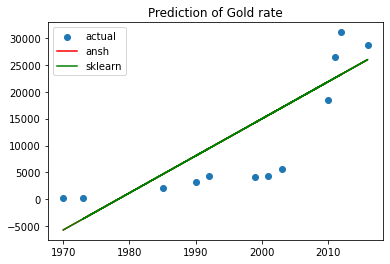

In [229]:
fig, ax = plt.subplots()
ax.scatter(xtest,ytest, label = "actual")
ax.plot(xtest, prediction, color = 'red', label = "ansh")
ax.plot(xtest, testing, color = 'green', label = "sklearn")
ax.set_title("Prediction of Gold rate")
ax.legend()
plt.show()

###     Both the lines are co-inciding

In [210]:
myValue = a+b*2025
print(myValue)

25878.467546296306


In [211]:
predictedValue = model.predict(np.array([2025]).reshape(-1,1))
print(predictedValue)

[25878.4675463]


# Gold Values in 2025

### My Prediction: 25878.467546296306


### SKLearn Prediction: 25878.4675463

# Prediction of Gold and Silver Data using MLR

In [113]:
data.head()

,gold,silver
1981,1645,2715
1982,1800,2720
1983,1970,3105
1984,2130,3570
1985,2140,3955


In [236]:
xNew = data.index

In [241]:
y1 = np.array(data.values[:,0])
y2 = np.array(data.values[:,1])

In [242]:
xnew = np.array(xNew)

In [244]:
x1train, x1test, y1train, y1test = splitData(xnew, y1)
x2train, x2test, y2train, y2test = splitData(xnew, y2)

In [249]:
goldxy, goldx, goldy, goldx2 = slopes(x1train, y1train)

In [250]:
silverxy, silverx, silvery, silverx2 = slopes(x2train, y2train)

In [252]:
goldb = getB(goldxy, goldx, goldy, goldx2, len(x1train))

In [253]:
silverb = getB(silverxy, silverx, silvery, silverx2, len(x2train))

In [254]:
goldMean = np.mean(y1train)

In [255]:
silverMean = np.mean(y2train)

In [261]:
intercept = np.mean(y1train) - goldb*goldMean - silverb - silverMean

In [263]:
goldPredicted = []
silverPredicted = []
for i in range(1981,2022):
    goldPredicted.append(goldb*i + intercept)
    silverPredicted.append(silverb*i + intercept)


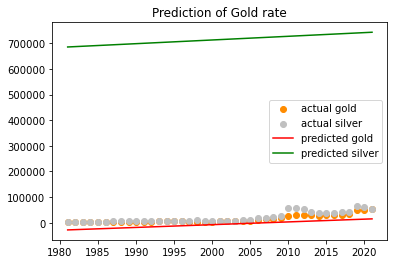

In [272]:
fig, ax = plt.subplots()
ax.scatter(xnew,y1, label = "actual gold", color = 'darkorange')
ax.scatter(xnew, y2, label = "actual silver", color = "silver")
ax.plot(xnew, goldPredicted, color = 'red', label = "predicted gold")
ax.plot(xnew, silverPredicted, color = 'green', label = "predicted silver")
ax.set_title("Prediction of Gold rate")
ax.legend()
plt.show()

In [282]:
goldMSE = mse(y1, goldPredicted)
silverMSE = mse(y2, silverPredicted)
goldRMSE = math.sqrt(goldMSE)
silverRMSE = math.sqrt(silverMSE)
print("Gold MSE and RMSE:",goldMSE, goldRMSE,"\nSilver MSE and RMSE:" ,silverMSE, silverRMSE, sep = '\n')

Gold MSE and RMSE:
483952902.5660263
21998.929577732328

Silver MSE and RMSE:
482456784136.3069
694591.0913165435


In [283]:
goldPrice = intercept + goldb * 2022
goldPrice/=10
print(goldPrice)

1588.993109966861


In [291]:
goldModel = LinearRegression()
goldModel.fit(np.array(x1train).reshape(-1,1), np.array(y1train).reshape(-1,1))
silverModel = LinearRegression()
silverModel.fit(np.array(x2train).reshape(-1,1), np.array(y2train).reshape(-1,1))

LinearRegression()

In [293]:
skgold = model.predict(np.array(x1test).reshape(-1,1))
sksilver = model.predict(np.array(x2test).reshape(-1,1))

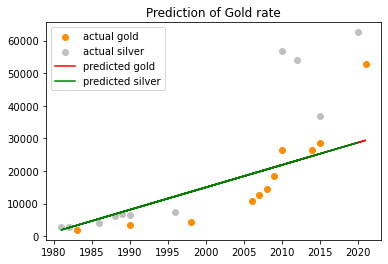

In [302]:
fig, ax = plt.subplots()
ax.scatter(x1test,y1test, label = "actual gold", color = 'darkorange')
ax.scatter(x2test,y2test, label = "actual silver", color = "silver")
ax.plot(x1test, skgold, color = 'red', label = "predicted gold")
ax.plot(x2test, sksilver, color = 'green', label = "predicted silver")
ax.set_title("Prediction of Gold rate")
ax.legend()
plt.show()

Graph is coinciding as there are 2 different testing values for gold and silver, hence the slope is **appearing** to be the same where it isn't

In [303]:
sksilver - skgold

array([  4814.79431342,  -9629.58862685,  -5502.62207248, -22698.316049  ,
       -11693.07190403,   3439.1387953 ,  -1375.65551812,  -6190.44983155,
        -1375.65551812,   2751.31103624, -15820.03845839])